# Import Packages

In [24]:
import sys  # Read system parameters.

import matplotlib as mpl  # Create 2D charts.
import matplotlib.pyplot as plt
import numpy as np  # Work with multi-dimensional arrays and matrices.
import pandas as pd  # Manipulate and analyze data.
import seaborn as sb  # Perform data visualization.
import sklearn  # Perform data mining and analysis.
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from scipy.stats import zscore

# Print summary
print("Libraries used in this project:")
print("- Python {}".format(sys.version))
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- Matplotlib {}".format(mpl.__version__))
print("- scikit-learn {}\n".format(sklearn.__version__))

Libraries used in this project:
- Python 3.9.20 (main, Oct  3 2024, 02:27:54) 
[Clang 14.0.6 ]
- NumPy 1.22.3
- pandas 1.4.1
- Matplotlib 3.8.4
- scikit-learn 1.2.2



In [25]:
wheat = pd.read_csv(
    "https://raw.githubusercontent.com/tyrantdavis/datasets/refs/heads/main/wheat_seeds.csv",
    header=None,
    delimiter=",",
    names=[
        "Area",
        "Perimeter",
        "Compactness",
        "Length_of_kernel",
        "Width_of_kernel",
        "Asymmetry_coefficient",
        "Length_of_kernel_groove",
        "Class(123)",
    ],
)
df = wheat.copy()

### View sample data

In [26]:
df.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class(123)
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Explore the Dataset

#### Count total NaN or missing values for each column in a DataFrame

The next step checks for Nan and Null or missing values. This may be considered somewhat repetitive since the details are already included in the output of the .info() command. Nevertheless, there is no disadvantage in being thoroughly comprehensive.

In [27]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Area                       0
Perimeter                  0
Compactness                0
Length_of_kernel           0
Width_of_kernel            0
Asymmetry_coefficient      0
Length_of_kernel_groove    0
Class(123)                 0
dtype: int64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length_of_kernel         210 non-null    float64
 4   Width_of_kernel          210 non-null    float64
 5   Asymmetry_coefficient    210 non-null    float64
 6   Length_of_kernel_groove  210 non-null    float64
 7   Class(123)               210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


### Check the data types and look for any missing entries.

**Spotlights** 

- The dataset consists of 210 entries and 5 attributes.
- All attributes are float numbers, except for the target attribute, which consists of integers. This target attribute indicates the seeds species that the model is expected to predict, categorized as 1, 2, or 3.
  
The labels for each species are defined as follows:
- Kama is labeled as 1.
- Rosa is labeled as 2.
- Canadian is labeled as 3.

- There are no missing values; every entry is complete with data in all attributes.
- The attributes provide various characteristics that aid in the classification of each specimen.

In [29]:
target_classes = df["Class(123)"].value_counts()

target_classes_list = target_classes.to_list()
print("Kama (Class 1):", target_classes_list[0], "\n")
print("Rosa (Class 2):", target_classes_list[1], "\n")
print("Besni (Class 3):", target_classes_list[2], "\n")


Kama (Class 1): 70 

Rosa (Class 2): 70 

Besni (Class 3): 70 



### Rename target column 'Class' 

In [30]:
df.rename(columns={"Class(123)": "target"}, inplace=True)
df.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<Axes: title={'center': 'Count (target)'}>

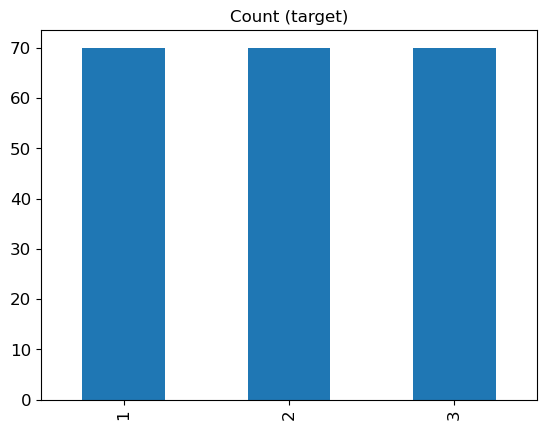

In [31]:
target_classes.plot(kind="bar", title="Count (target)", grid=False)

**Spotlights** 

The distribution of outcomes in this dataset is notably symmetrical, with both classes occurring at equal frequencies. This characteristic positions it as an excellent candidate for implementation within a Support Vector Machine (SVM) model, distinguishing it from many datasets typically found in practical applications.

In [32]:
data = df.drop(columns="target", axis=1)

## Examine Summary Statistics

In [33]:
with pd.option_context("float_format", "{:.2f}".format):
    print(df.describe())

        Area  Perimeter  Compactness  Length_of_kernel  Width_of_kernel  \
count 210.00     210.00       210.00            210.00           210.00   
mean   14.85      14.56         0.87              5.63             3.26   
std     2.91       1.31         0.02              0.44             0.38   
min    10.59      12.41         0.81              4.90             2.63   
25%    12.27      13.45         0.86              5.26             2.94   
50%    14.36      14.32         0.87              5.52             3.24   
75%    17.30      15.71         0.89              5.98             3.56   
max    21.18      17.25         0.92              6.67             4.03   

       Asymmetry_coefficient  Length_of_kernel_groove  target  
count                 210.00                   210.00  210.00  
mean                    3.70                     5.41    2.00  
std                     1.50                     0.49    0.82  
min                     0.77                     4.52    1.00  
25% 

**Spotlights**

- The dataset is quite straightforward and generally tidy, requiring minimal feature engineering.
- There might be a handful of outliers that could affect the performance of a classification model.

In [34]:
reordered = [
        "Asymmetry_coefficient",
        "Compactness",
        "Width_of_kernel",
        "Area",
        "Perimeter",
        "Length_of_kernel",
        "Length_of_kernel_groove",]
df[reordered].corr()

,Asymmetry_coefficient,Compactness,Width_of_kernel,Area,Perimeter,Length_of_kernel,Length_of_kernel_groove
Asymmetry_coefficient,1.000000,-0.331471,-0.258037,-0.229572,-0.217340,-0.171562,-0.011079
Compactness,-0.331471,1.000000,0.761635,0.608288,0.529244,0.367915,0.226825
Width_of_kernel,-0.258037,0.761635,1.000000,0.970771,0.944829,0.860415,0.749131
Area,-0.229572,0.608288,0.970771,1.000000,0.994341,0.949985,0.863693
Perimeter,-0.217340,0.529244,0.944829,0.994341,1.000000,0.972422,0.890784
Length_of_kernel,-0.171562,0.367915,0.860415,0.949985,0.972422,1.000000,0.932806
Length_of_kernel_groove,-0.011079,0.226825,0.749131,0.863693,0.890784,0.932806,1.000000


<Axes: title={'center': 'All Correlations'}>

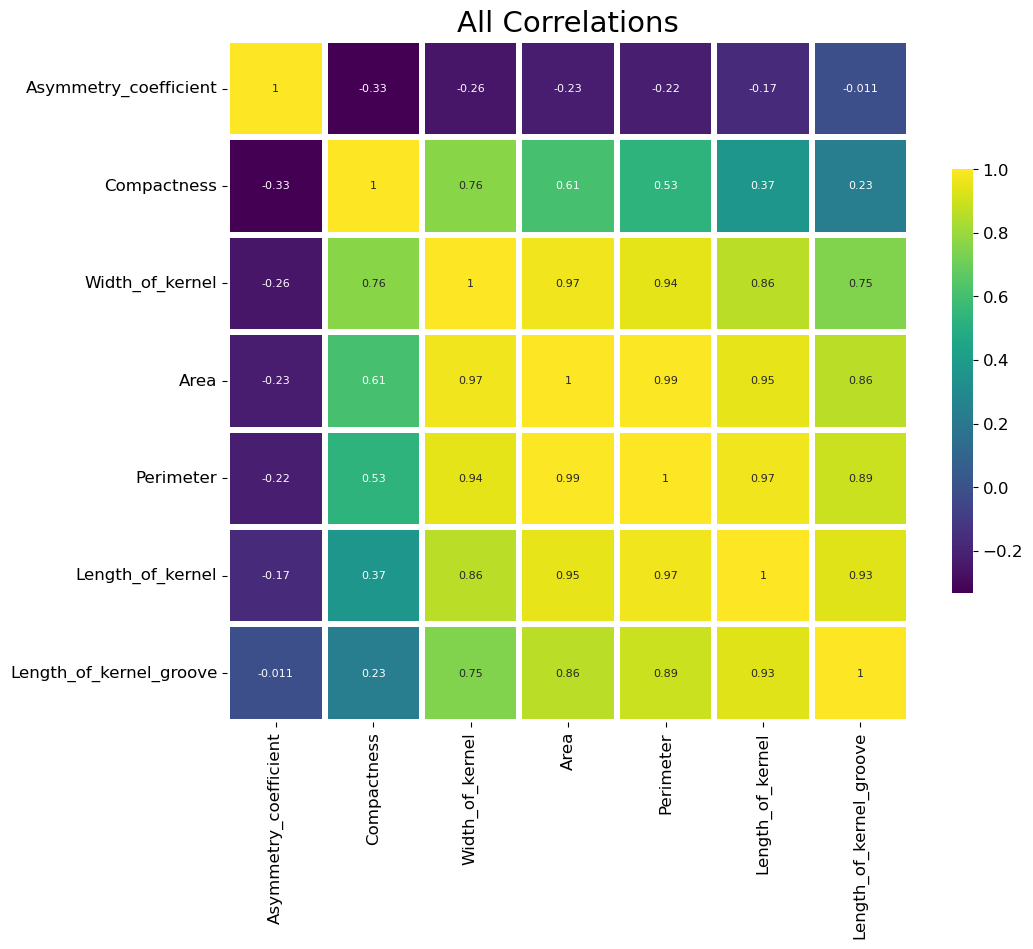

In [35]:
# Specify size and title for visualization
f, axes = plt.subplots(figsize=(11, 11))
plt.title("All Correlations", fontsize=21)

# Use Seaborn to plot the correlation matrix as a hetamap
sb.heatmap(
    df[reordered].corr(),
    linewidths=3.0,
    square=True,
    cmap="viridis",
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.5},
)

### Graph Figures

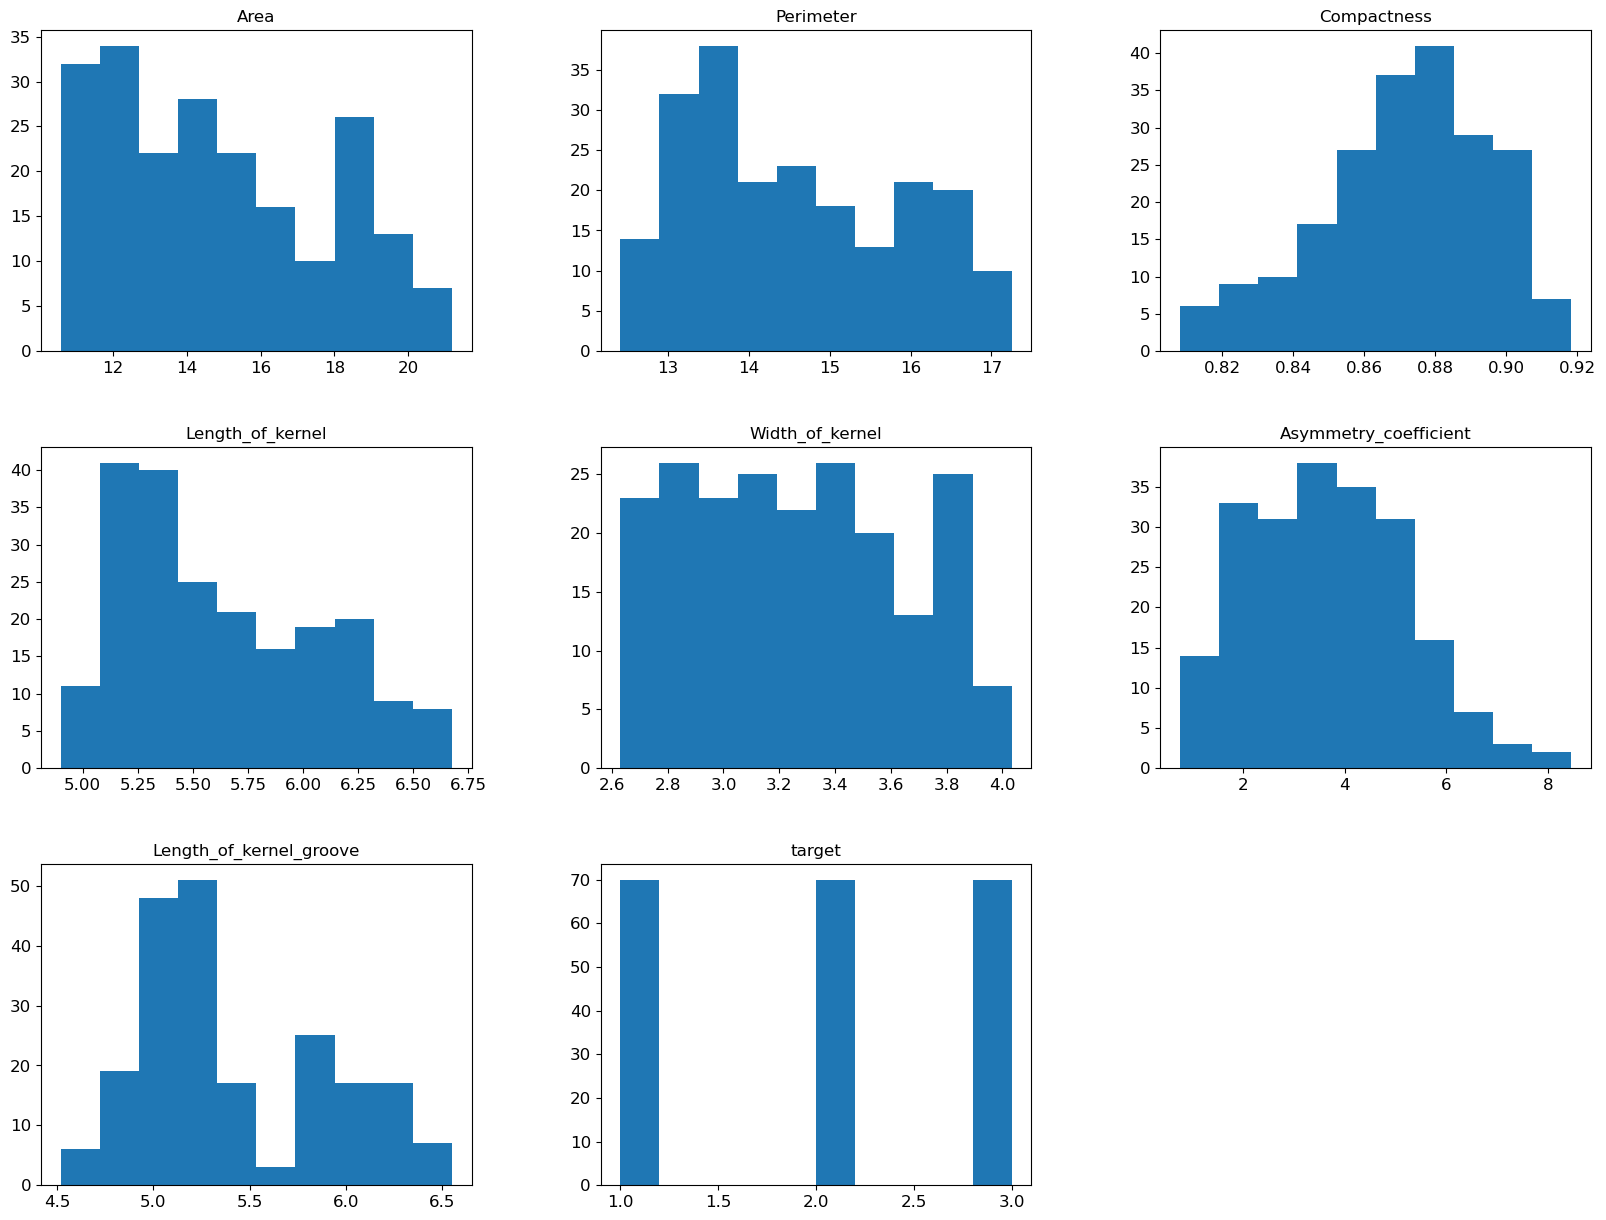

<Figure size 640x480 with 0 Axes>

In [36]:
%matplotlib inline
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

df.hist(figsize=(20, 15), grid=False)
plt.figure();

**Spotlights**

- The dataset is relatively simple and well-organized, necessitating only a limited amount of feature engineering.
- A few outliers may exist that could potentially impact the effectiveness of a classification model.
- In general, the dataset's straightforward nature facilitates ease of use, although it remains crucial to monitor outliers.
- Additionally, the distribution of class labels (target) is balanced as discussed earlier. 

## Drop Highly Correlated Features

When features exhibit a high degree of correlation, a phenomenon known as multicollinearity arises, complicating the ability of the Support Vector Machine (SVM), which will be implemented later, to ascertain the distinct impact of each feature on the prediction. This situation results in coefficient estimates that may be deemed unreliable.

The next step removes the 'Area', 'Perimeter', and the 'Length_of_kernel' features. 

In [37]:
df.drop(columns=["Area", "Perimeter", "Length_of_kernel"], inplace=True)

## Detect Outliers

The subsequent phase involves analyzing a boxplot that illustrates the mean characteristics, as indicated by a predictors array, to detect and remove any noticeable outliers. Support Vector Machines are particularly sensitive to outliers, making it crucial to address any significantly impactful outliers before developing the model.

Considering that the a few features do not adhere to a normal distribution, it is more beneficial to evaluate the boxplot of the log-transformed z-scores.

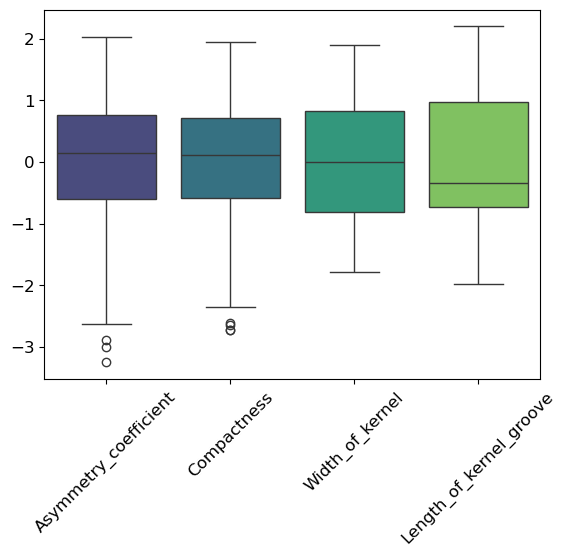

In [38]:
features = [
        "Asymmetry_coefficient",
        "Compactness",
        "Width_of_kernel",
        "Length_of_kernel_groove",]

sb.boxplot(data=np.log(df[features] + 0.01).apply(zscore),palette="viridis")
plt.xticks(rotation=45)
plt.show()
plt.close()


**Spotlights** 

It seems that there are a handful of unusual values when it comes to Compactness and Asymmetry_coefficient. These outliers stand out from the rest of the data, indicating that they may not fit the typical pattern observed. Identifying these anomalies can be quite helpful in understanding the overall distribution and characteristics of Compactness and Asymmetry_coefficient in the dataset.

## Split the Label From the Dataset

In [39]:
# Split the training and test datasets and their labels.
X = df.drop("target", axis=1)
y = df.target

## Compare Shape of Original Dataset to Training and Test Sets.

In [40]:
# Compare the number of rows and columns in the original data to the training and test sets.
print("Original data shape:", df.shape)
print("X shape (features):", X.shape)
print("y shape (target):", y.shape)

Original data shape: (210, 5)
X shape (features): (210, 4)
y shape (target): (210,)


# Decrease the Dataset's Dimensionality

Initially, the focus will be on just two of the seven features, specifically 'Area' and 'Perimeter', while examining only two of the three seed species, which are Kama and Rosa. The complete dataset will eventually be used too train the model as progress is made.

In [41]:
"""To focus on the analysis, only  the last two characteristics: 'Area' and 'Perimeter' will be consider."""
data = X.copy()
examined_features = pd.DataFrame(data.iloc[:, -2:])
# examined_features = pd.DataFrame(data.iloc[:, :2])
# examined_features = pd.DataFrame(data.iloc[:, 2:4])
label = y.copy()

print("\nBefore reduction:")
print("Features dataset dimensions are", examined_features.shape)
print("Label dataset dimensions are", label.shape)

"""Restrict your labels to just two options: 0 for Kama and 1 for Rosa, when categorizing."""
labels = (label == 1) | (label == 2)
examined_features = examined_features[labels]
label = label[labels]

print("\nAfter reduction:")
print("examined_features dataset dimensions are", examined_features.shape)
print("Label dataset dimensions are", label.shape)


Before reduction:
Features dataset dimensions are (210, 2)
Label dataset dimensions are (210,)

After reduction:
examined_features dataset dimensions are (140, 2)
Label dataset dimensions are (140,)


# Evaluate Class Separation

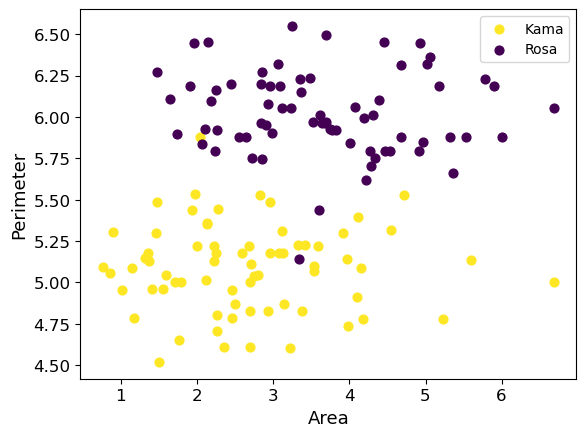

In [42]:
"""The x-axis = Sepal length, the y-axis = sepal width."""

feature_scatter = np.array(examined_features)[:, 0]
label_scatter = np.array(examined_features)[:, 1]
feature_scatter
cdict = {1: "#fde725", 2: "#440154"}

# Generate scatter plot with legend.
for color_label in np.unique(label):
    if color_label == 1:
        seed = "Kama"
    if color_label == 2:
        seed = "Rosa"

    ix = np.where(label == color_label)
    plt.scatter(
        feature_scatter[ix], label_scatter[ix], c=cdict[color_label], label=seed, s=40
    )

plt.legend()
plt.xlabel("Area", fontsize=13)
plt.ylabel("Perimeter", fontsize=13)
plt.annotate(
    "Possible outlier",
    xy=(4.4, 2.3),
    xytext=(2.9, 2.2),
    arrowprops=dict(color="black"), # green
    fontsize=15,
);

**Spotlights**

Here is a simple scatter plot showcasing the two features we extracted earlier: Area and Perimeter.

- The purple dots located in the upper left represent the data points for Kama seeds.
- The yellow dots found in the lower right indicate the data points for Rosa seeds.
- Overall, it appears that these two features can be fairly well separated by a straight decision boundary.
- There are four instances that are misclassified which are surely the results of outliers in the dataset as discussed previously.

### Graph the Decision Boundary for a Specified Model

In [43]:
def graph_decision_boundary(X, y, model, is_svm):

    features_scatter = np.array(X)[:, 0]
    label_scatter = np.array(X)[:, 1]

    cdict = {1: "#fde725", 2: "#440154"}

    for color_label in np.unique(y):
        if color_label == 1:
            seed = "Kama"
        if color_label == 2:
            seed = "Rosa"

        ix = np.where(y == color_label)
        plt.scatter(
            features_scatter[ix],
            label_scatter[ix],
            c=cdict[color_label],
            label=seed,
            s=40,
        )

    plt.legend()
    plt.xlabel("Area", fontsize=13)
    plt.ylabel("Perimeter", fontsize=13)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    """Generate the grid."""
    xx = np.linspace(xlim[0], xlim[1], 40)
    yy = np.linspace(ylim[0], ylim[1], 40)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    """Utilize the model's decision function to visualize the boundary."""
    Z = model.decision_function(xy).reshape(XX.shape)

    if is_svm == True:
        """Create a plot for the decision boundary along with the margins."""
        ax.contour(
            XX, YY, Z, colors="r", levels=[-1, 0, 1], linestyles=["--", "-", "--"]
        )

        """Graph the support vectors."""
        ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=100,
            linewidth=1,
            facecolors="none",
            edgecolors="k",
        )
    else:
        ax.contour(XX, YY, Z, colors="r", levels=[0], linestyles=["-"])

    plt.show()


print("A function for plotting the decision boundary has been established.")

A function for plotting the decision boundary has been established.


### Develop a Fundamental Logistic Regression Model and Illustrate its Decision Boundary.

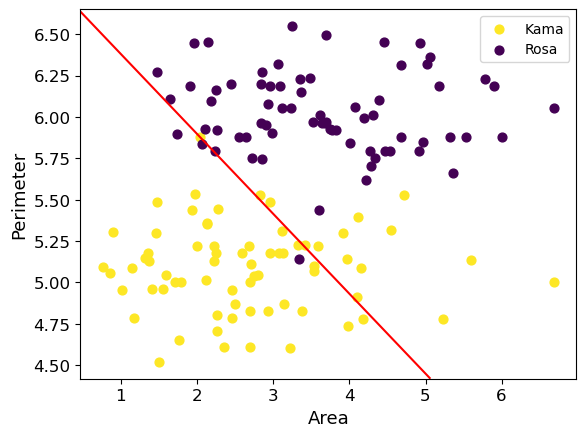

In [44]:
log_reg = LogisticRegression(solver="liblinear", random_state=1936)
log_reg.fit(examined_features.values, label.values)

graph_decision_boundary(examined_features, label, log_reg, False)

**Spotlights** 

The decision boundary generally does a less than stellar job of separating the classes. There is a clear break between the two classes, the empty space between them forming a line, which the boundary fails to generalize. This maybe a sign of underfitting. Additionally, the previously mislabeled  instances have increased in number.